# Story - 4 : How much do we get paid?

I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.

For this story we will answer the question, "How much do we get paid?" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

Notes:


1. You will need to identify reliable sources for salary data and assemble the data sets that you will need.
  
2. Your visualization(s) must show the most salient information (variation in average salary by role and by state).
  
3. For this Story you must use a code library and code that you have written in R, Python or Java Script (additional coding in other languages is allowed).

4. Post generation enhancements to you generated visualization will be allowed (e.g. Addition of kickers and labels).

5. This assignment is due at the end of the week eight of the semester.



# Introduction

The term "Data Practitioner" has emerged as a generic descriptor that encompasses a variety of job roles, including Data Scientist, Data Engineer, Data Analyst, Business Analyst, and Data Architect. While these roles often involve overlapping tasks and responsibilities, they also offer distinct career paths with varying salary scales. In this assignment, we aim to highlight these salary differences and provide overview of how different states pay the top data practitoner jobs. This information will provide students more direction when considering a career in data.

# Data Gathering

Salary data was gathered from ZipRecruiter (https://www.ziprecruiter.com/Salaries/What-Is-the-Average-DATA-Scientist-Salary-by-State". Unfortunately, I was note able to scrap the table on their website so I copied the table to an excel sheet and uploaded it to my github. ZipRecruiter's salary estimates are derived from employer job postings and third party data sources. The salaries of these professions are averages in the state.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
urls = {
    'Data Scientist': 'https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20608/Story%204/Data%20scientist%20salary.csv',
    'Business Analyst': 'https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20608/Story%204/Business%20analyst%20salary.csv',
    'Data Analyst': 'https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20608/Story%204/Data%20analyst%20salary.csv',
    'Data Engineer': 'https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20608/Story%204/data%20engineer%20salary.csv'
}

merged_df = pd.DataFrame()

for profession, url in urls.items():
    df = pd.read_csv(url, usecols=[0, 1])
    df.columns = ['State', profession]
    if merged_df.empty:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='State')

merged_df.head()

,State,Data Scientist,Business Analyst,Data Analyst,Data Engineer
0,New York,"$136,172","$104,389","$98,166","$132,125"
1,Vermont,"$133,828","$102,235","$79,108","$129,022"
2,California,"$131,441","$98,699","$74,169","$122,739"
3,Maine,"$127,644","$96,141","$72,629","$119,873"
4,Idaho,"$126,275","$94,604","$70,811","$117,414"


### Cleaning up the data

In [ ]:
# Converting the salaries to an int
for col in merged_df.columns[1:]:
    merged_df[col] = merged_df[col].replace('[\$,]', '', regex=True).astype(int)

merged_df.head()

,State,Data Scientist,Business Analyst,Data Analyst,Data Engineer
0,New York,136172,104389,98166,132125
1,Vermont,133828,102235,79108,129022
2,California,131441,98699,74169,122739
3,Maine,127644,96141,72629,119873
4,Idaho,126275,94604,70811,117414


In [ ]:
merged_df.describe()

,Data Scientist,Business Analyst,Data Analyst,Data Engineer
count,50.000000,50.00000,50.000000,50.000000
mean,112831.660000,90439.16000,77604.600000,121282.420000
std,10364.644272,9404.58729,6929.938825,14497.204841
min,91843.000000,70687.00000,63890.000000,89766.000000
25%,105356.000000,84045.75000,72227.000000,111515.500000
50%,112170.000000,90024.50000,76811.500000,119560.500000
75%,120696.750000,95539.75000,82187.500000,128961.250000
max,136172.000000,115300.00000,98166.000000,149704.000000


In [ ]:
merged_df['Salary Difference'] = merged_df['Data Scientist'] - merged_df['Data Engineer']

In [ ]:
merged_df.sort_values('Salary Difference', ascending=False).head()

,State,Data Scientist,Business Analyst,Data Analyst,Data Engineer,Salary Difference
4,Idaho,126275,94604,70811,117414,8861
2,California,131441,98699,74169,122739,8702
3,Maine,127644,96141,72629,119873,7771
1,Vermont,133828,102235,79108,129022,4806
0,New York,136172,104389,98166,132125,4047


In [ ]:
# Melt the DataFrame to make it suitable for a histogram
df_melted = merged_df.melt(id_vars=['State', 'Salary Difference'], var_name='Profession', value_name='Salary')

In [ ]:
df_melted.head()

,State,Salary Difference,Profession,Salary
0,New York,4047,Data Scientist,136172
1,Vermont,4806,Data Scientist,133828
2,California,8702,Data Scientist,131441
3,Maine,7771,Data Scientist,127644
4,Idaho,8861,Data Scientist,126275


# Data Visualization

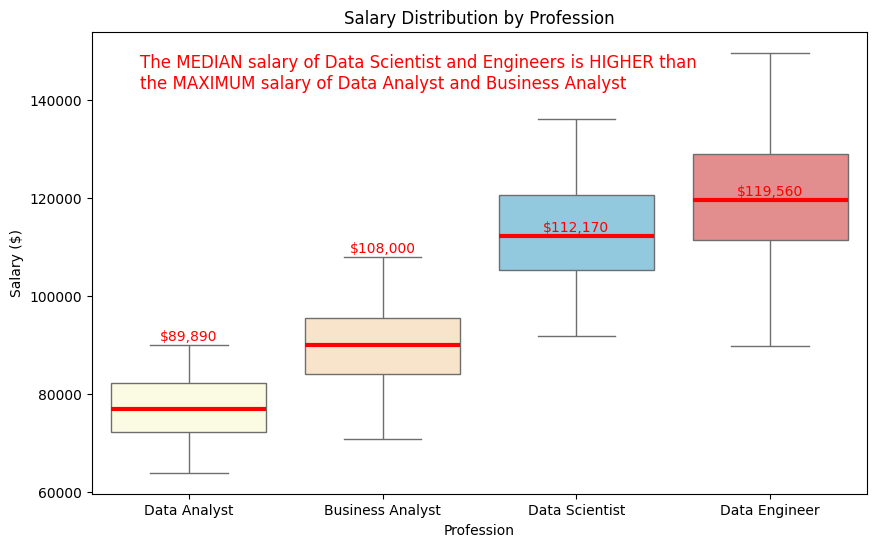

In [ ]:
plt.figure(figsize=(10, 6))

order = ['Data Analyst', 'Business Analyst', 'Data Scientist', 'Data Engineer']

medianprops = {'color': 'red', 'linewidth': 3}
palette = {'Data Analyst': 'lightyellow', 'Business Analyst': 'bisque', 'Data Scientist': 'skyblue', 'Data Engineer': 'lightcoral'}

sns.boxplot(x='Profession', y='Salary', data=df_melted, order=order, palette=palette, hue="Profession", medianprops=medianprops, showfliers=False)
plt.title('Salary Distribution by Profession')
plt.ylabel('Salary ($)')
plt.text(-0.25,142500,'The MEDIAN salary of Data Scientist and Engineers is HIGHER than\nthe MAXIMUM salary of Data Analyst and Business Analyst',color='red',fontsize=12)
plt.text(0,90890,'$89,890', ha='center',color='red')
plt.text(1,109000,'$108,000', ha='center',color='red')
plt.text(2,113100,'$112,170', ha='center',color='red')
plt.text(3,120560,'$119,560', ha='center',color='red')

plt.show()

From a financial perspective, it is clear that Data Scientists and Data Engineers are the two most lucrative professions in the data field. The median salaries for these roles surpass even the maximum salaries of Data Analysts and Business Analysts. Therefore, if one’s primary consideration in the data field is financial gain, the roles of Data Analyst and Business Analyst may not be the most rewarding. Therefore, we will just be focusing on highlighting the salaries of Data Scientists and Data Engineers.

In [ ]:
# # Average by state
# merged_df['Average'] = merged_df.iloc[:, 1:].mean(axis=1).astype(int)

# # Average salary for each profession
# average_row = merged_df.mean()
# average_row['State'] = 'Average'
# merged_df = merged_df.append(average_row, ignore_index=True)
# df_melted = merged_df.melt(id_vars=['State', 'difference'], var_name='Profession', value_name='Salary')

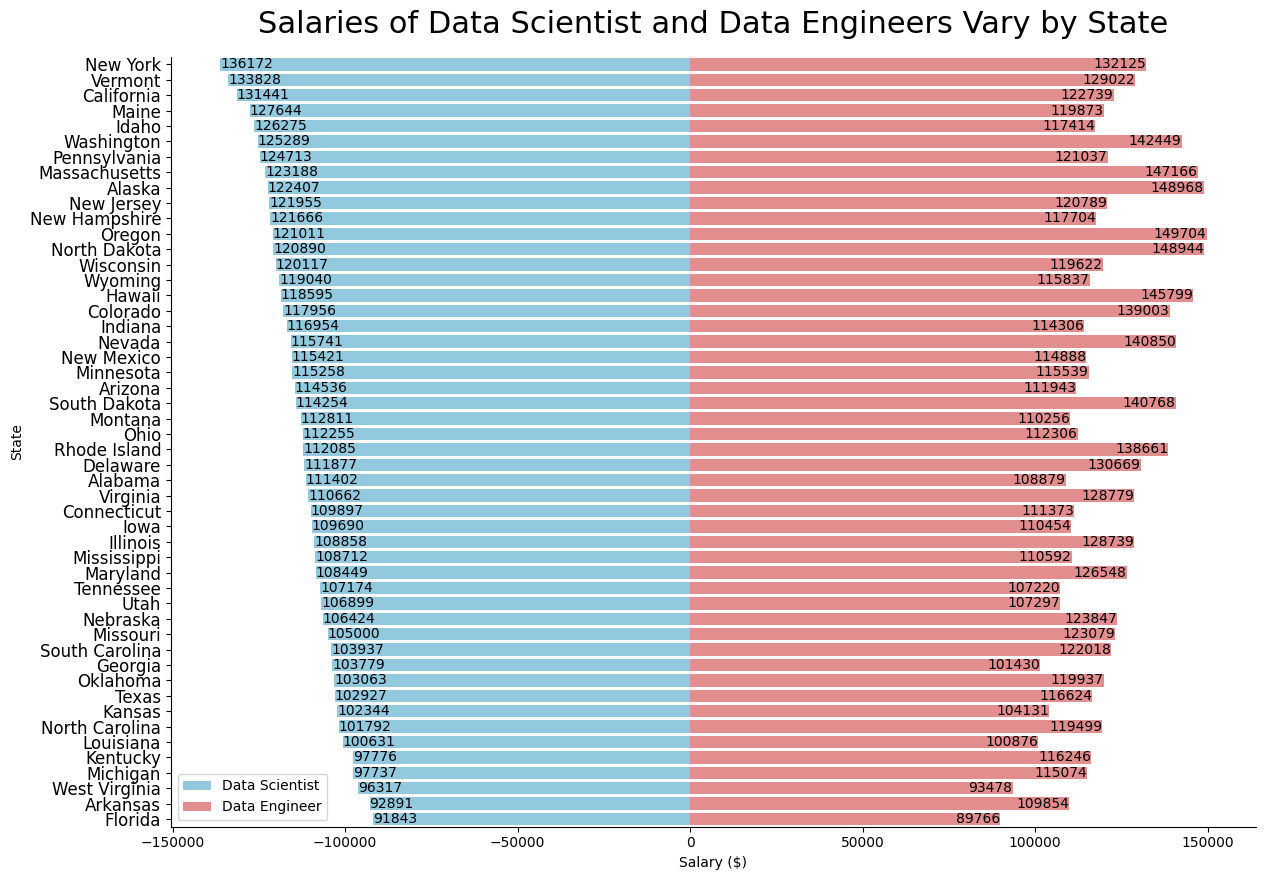

In [ ]:
# Filter the DataFrame for Data Scientists and Data Engineers
df_filtered = df_melted[df_melted['Profession'].isin(['Data Scientist', 'Data Engineer'])]

data_scientist_salaries = df_filtered[df_filtered['Profession'] == 'Data Scientist']
data_engineer_salaries = df_filtered[df_filtered['Profession'] == 'Data Engineer']

plt.figure(figsize=(14,10))

order = ['Data Scientist', 'Data Engineer']

# Swap the data inputs in the sns.barplot function calls
sns.barplot(x=-data_scientist_salaries['Salary'], y=data_scientist_salaries['State'], orient='h', color='skyblue', label='Data Scientist')
sns.barplot(x='Salary', y='State', data=data_engineer_salaries, orient='h', color='lightcoral', label='Data Engineer')

# Adding text to each bar
for i in range(len(data_scientist_salaries['State'])):
    plt.text(-data_scientist_salaries['Salary'].iloc[i], i,
             round(data_scientist_salaries['Salary'].iloc[i]),
             va = 'center', ha='left', color='black', fontsize=10)

for i in range(len(data_engineer_salaries['State'])):
    plt.text(data_engineer_salaries['Salary'].iloc[i], i,
             round(data_engineer_salaries['Salary'].iloc[i]),
             va = 'center', ha='right', color='black', fontsize=10)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Salary ($)')
plt.ylabel('State')
plt.yticks(fontsize=12)
plt.title('Salaries of Data Scientist and Data Engineers Vary by State', fontsize=22, y=1.02)
plt.legend()
plt.show()

In [ ]:
# Calculate the difference in salaries
merged_df['Salary Difference'] = merged_df['Data Scientist'] - merged_df['Data Engineer']

df_plot = merged_df[['State', 'Salary Difference']].copy()

# Separate positive and negative differences
df_plot['Data Scientist Difference'] = df_plot['Salary Difference'].apply(lambda x: x if x > 0 else 0)
df_plot['Data Engineer Difference'] = df_plot['Salary Difference'].apply(lambda x: -x if x < 0 else 0)

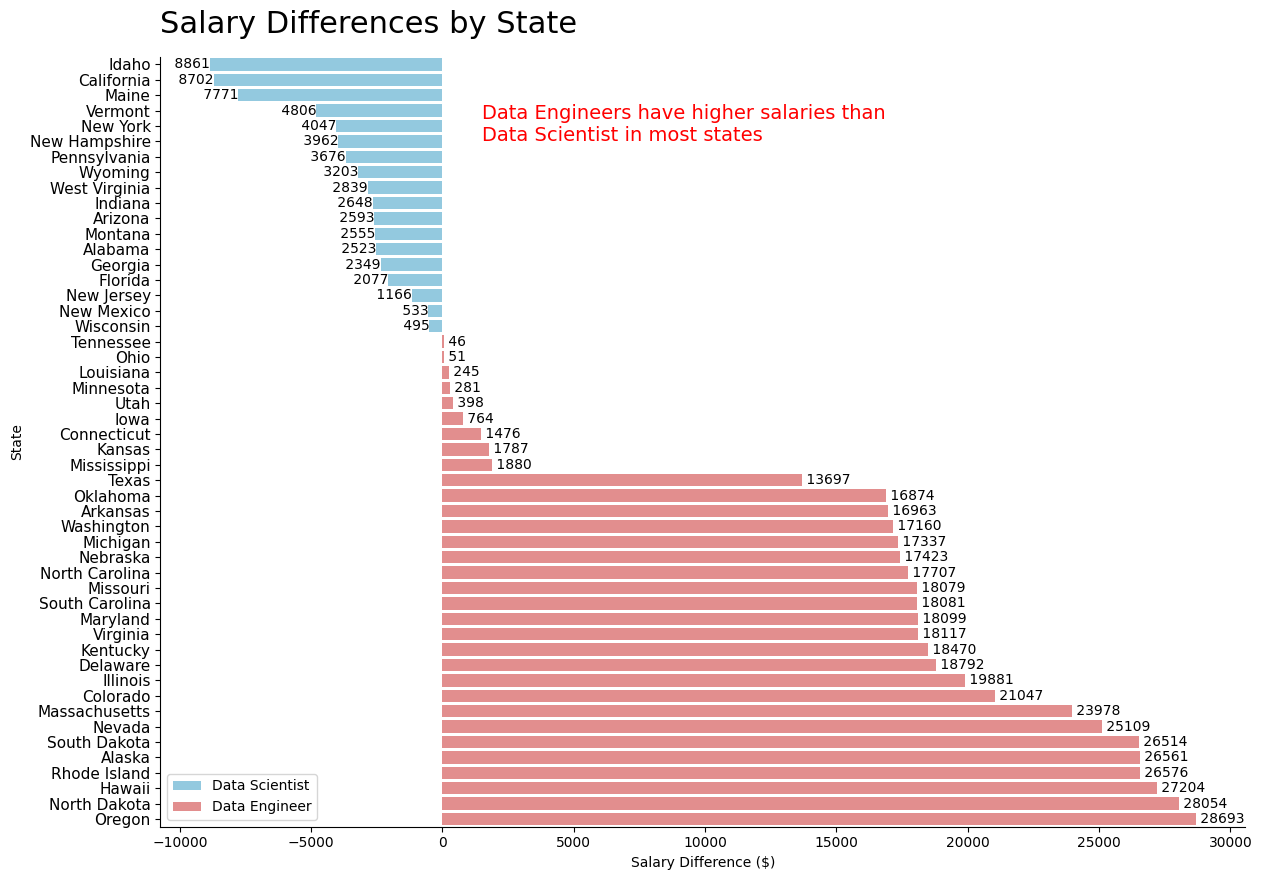

In [ ]:
plt.figure(figsize=(14,10))

df_plot.sort_values('Salary Difference', ascending=False, inplace=True)

sns.barplot(x=-df_plot['Data Scientist Difference'], y='State', data=df_plot, orient='h', color='skyblue', label='Data Scientist')
sns.barplot(x=df_plot['Data Engineer Difference'], y='State', data=df_plot, orient='h', color='lightcoral', label='Data Engineer')

# Add labels
for i, v in enumerate(df_plot['Data Scientist Difference']):
    if v != 0:  # Only add label if value is not zero
        plt.text(-v, i, " "+str(round(v)), color='black', va='center', fontweight='light', fontsize=10, ha='right')

for i, v in enumerate(df_plot['Data Engineer Difference']):
    if v != 0:  # Only add label if value is not zero
        plt.text(v, i, " "+str(round(v)), color='black', va='center', fontweight='light', fontsize=10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Salary Difference ($)')
plt.ylabel('State')
plt.yticks(fontsize=11)
plt.title('Salary Differences by State', fontsize=22, y=1.02, loc='left')
plt.text(1500,5,'Data Engineers have higher salaries than\nData Scientist in most states',color='red',fontsize=14)
plt.legend(loc='lower left')
plt.show()

In 31 of the 49 states, Data Engineers received a higher salary than Data Scientist. In most states, the difference in salary amount is over \$13,000, which is a substantial amount considering the median salary for all Data Scientist is \$112,000. A \$13,000 difference is salary is more than 10% of a Data Scientist's annual salary.

# Conclusion

In conclusion, our analysis reveals that the median salaries for Data Scientists and Data Engineers are higher than even the maximum salaries for Data Analysts and Business Analysts. This suggests that, from a financial perspective, pursuing a career in Data Science or Data Engineering could be more lucrative. Furthermore, this analysis also shows that salaries for these professions vary by state, indicating that location is an important factor to consider when evaluating potential earnings. Lastly, if a studnet is considering which data career path to pursue, it is clear that Data Science and Data Engineering offer the best finanical reward.
